In [39]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import keras
import numpy as np

In [27]:
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [74]:
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [29]:
layer_names = [layer.name for layer in model.layers]
layer_names

['input_2',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_pool',
 'flatten',
 'fc1',
 'fc2',
 'predictions']

In [30]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv3')>,
 <KerasTensor: shape=(None, 28, 28, 256) dtype=float32 (created by layer 'block3_pool')>,


In [32]:
model = tf.keras.models.Model(inputs=model.inputs, outputs=layer_outputs)

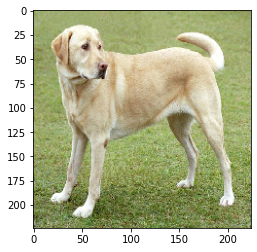

In [37]:
img = keras.preprocessing.image.load_img('/content/drive/MyDrive/datasets/Photo/dog.jpg', target_size=(224,224))
plt.imshow(img)

In [38]:
img = keras.preprocessing.image.img_to_array(img)

In [40]:
img = np.expand_dims(img, axis=0)

In [41]:
img = keras.applications.vgg16.preprocess_input(img)

In [48]:
feature_maps = model.predict(img)

In [49]:
for layer_name, feature_map in zip(layer_names, feature_maps):  
  print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

The shape of the input_2 is =======>> (1, 224, 224, 3)
The shape of the block1_conv1 is =======>> (1, 224, 224, 64)
The shape of the block1_conv2 is =======>> (1, 224, 224, 64)
The shape of the block1_pool is =======>> (1, 112, 112, 64)
The shape of the block2_conv1 is =======>> (1, 112, 112, 128)
The shape of the block2_conv2 is =======>> (1, 112, 112, 128)
The shape of the block2_pool is =======>> (1, 56, 56, 128)
The shape of the block3_conv1 is =======>> (1, 56, 56, 256)
The shape of the block3_conv2 is =======>> (1, 56, 56, 256)
The shape of the block3_conv3 is =======>> (1, 56, 56, 256)
The shape of the block3_pool is =======>> (1, 28, 28, 256)
The shape of the block4_conv1 is =======>> (1, 28, 28, 512)
The shape of the block4_conv2 is =======>> (1, 28, 28, 512)
The shape of the block4_conv3 is =======>> (1, 28, 28, 512)
The shape of the block4_pool is =======>> (1, 14, 14, 512)
The shape of the block5_conv1 is =======>> (1, 14, 14, 512)
The shape of the block5_conv2 is =======>>

block1_conv1 (3, 3, 512, 512)
64


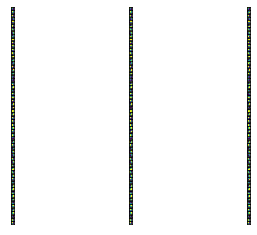

block1_conv2 (3, 3, 3, 64)
64


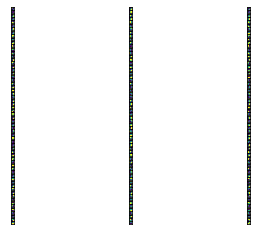

block2_conv1 (3, 3, 64, 64)
128


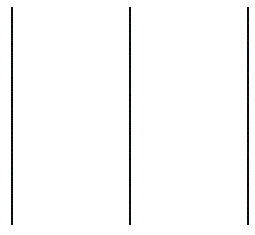

block2_conv2 (3, 3, 64, 128)
128


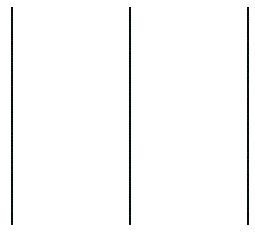

block3_conv1 (3, 3, 128, 128)
256


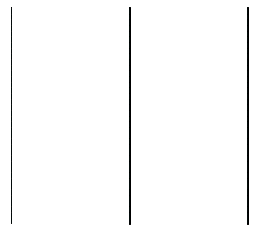

block3_conv2 (3, 3, 128, 256)
256


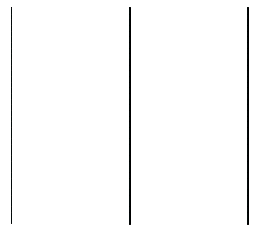

block3_conv3 (3, 3, 256, 256)
256


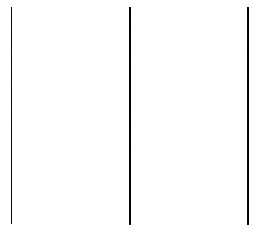

block4_conv1 (3, 3, 256, 256)
512


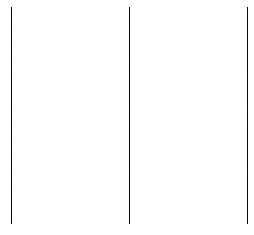

block4_conv2 (3, 3, 256, 512)
512


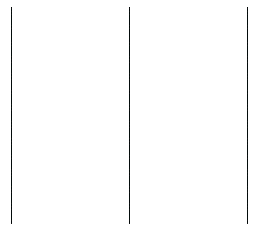

block4_conv3 (3, 3, 512, 512)
512


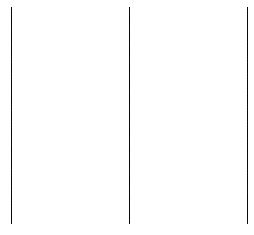

block5_conv1 (3, 3, 512, 512)
512


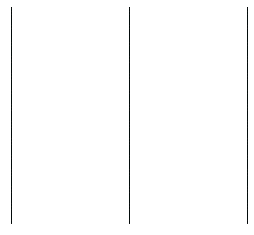

block5_conv2 (3, 3, 512, 512)
512


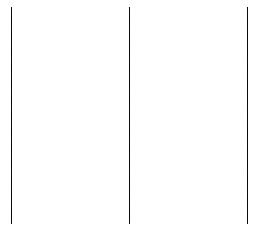

block5_conv3 (3, 3, 512, 512)
512


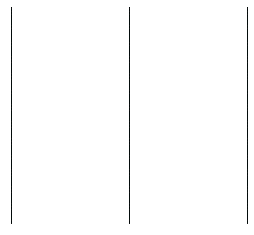

In [73]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, filters.shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

In [79]:
successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

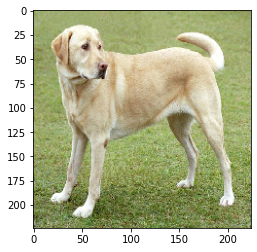

In [80]:
img = keras.preprocessing.image.load_img('/content/drive/MyDrive/datasets/Photo/dog.jpg', target_size=(224,224))
plt.imshow(img)

In [81]:
x = keras.preprocessing.image.img_to_array(img)
x = x.reshape((1,) + x.shape)
x /= 255.0

In [82]:
successive_feature_maps = visualization_model.predict(x)

(1, 224, 224, 64)
(1, 224, 224, 64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(1, 112, 112, 64)
(1, 112, 112, 128)
(1, 112, 112, 128)
(1, 56, 56, 128)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 28, 28, 256)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 7, 7, 512)
(1, 25088)
(1, 4096)
(1, 4096)
(1, 1000)


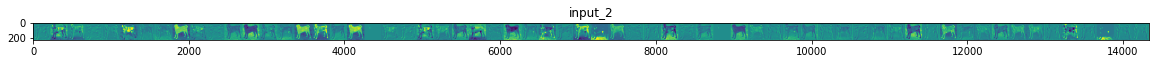

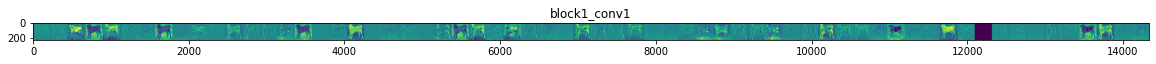

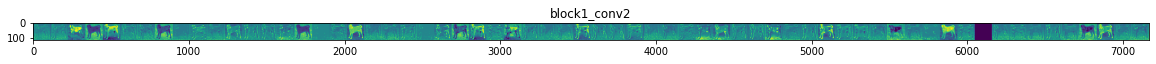

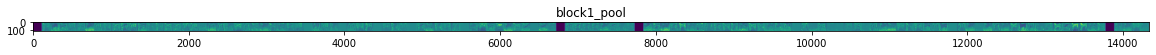

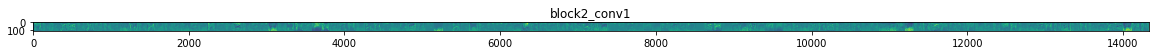

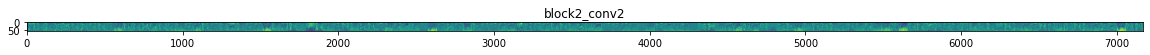

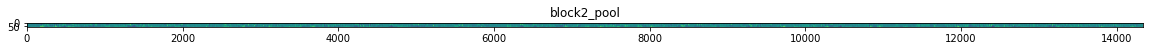

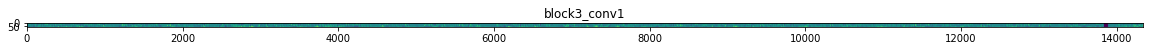

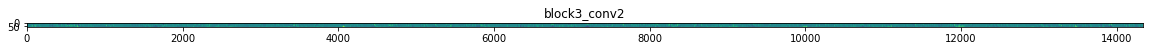

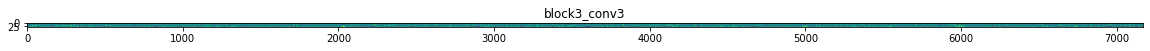

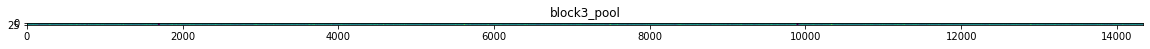

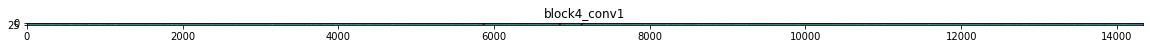

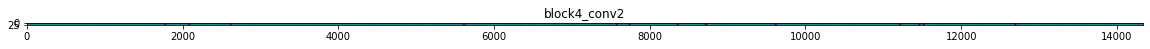

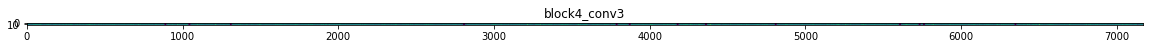

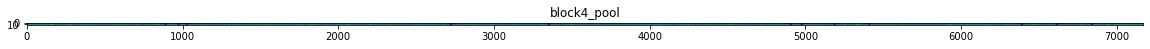

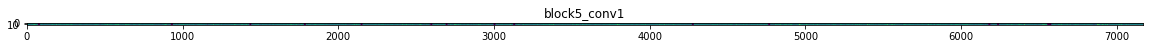

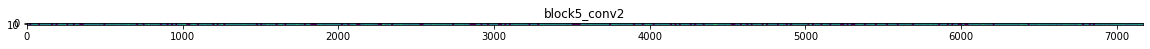

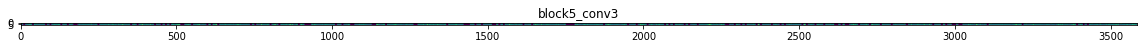

In [85]:
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]

    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
      x = feature_map[0,:,:,i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x 
    
    scale = 20. / n_features
    plt.figure ( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis')